In [130]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import tensorflow as tf
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib import rnn

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import tensorflow as tf

In [131]:
cur_dir = os.getcwd()
print("Current directory: {}".format(cur_dir))
# list files in the current directory
#print("Files in the current directory: {}".format(os.listdir(cur_dir)))
data_path = cur_dir+"/drugsCom"
train_path = data_path + "/drugsTrainingDataWithFeatures"
test_path = data_path + "/drugsTestingDataWithFeatures"
#rawdata_path = cur_dir+"/drugsCom"
#metadata_path = cur_dir+"/meta_Health_and_Personal_Care.json.gz"
print("Path of the raw data: {}".format(data_path))
print("Files in the drugCom directory: {}".format(os.listdir(data_path)))

Current directory: C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects
Path of the raw data: C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects/drugsCom
Files in the drugCom directory: ['drug-enforcement-0001-of-0001.json', 'drug-enforcement-0001-of-0001.json.zip', 'drugsComTest_raw.tsv', 'drugsComTrain_raw.tsv', 'drugsTestingDataWithFeatures', 'drugsTrainingDataWithFeatures', 'drugs_recalls_fda.tsv', 'FDA_Drug_Recalls_2012_to_2016_by_Recall_Class.csv', 'fda_med_devices_recalls_2014_to_2017.tsv']


In [371]:
train = pd.read_table(train_path, sep='\t')
test = pd.read_table(test_path, sep='\t')

In [372]:
train = train.drop(columns=train.columns[0]).rename(columns={train.columns[1]:'id'})
test = test.drop(columns=test.columns[0]).rename(columns={test.columns[1]:'id'})
train = train.drop(columns = ['id', 'usefulCount','drugName', 'condition', 'review', 'rating', 'date'])
test = test.drop(columns = ['id', 'usefulCount','drugName', 'condition', 'review', 'rating', 'date'])
print (train.head())
whole = pd.concat([train, test])

   Sentimental_Polarity  Sentimental_Subjectivity  recall_status  vader_neg  \
0              0.000000                  0.000000           True      0.000   
1              0.188021                  0.482812          False      0.035   
2              0.138485                  0.327475          False      0.039   
3              0.357143                  0.607143          False      0.118   
4              0.172333                  0.389667          False      0.113   

   vader_neu  vader_pos  vader_comp  stanford_neg  stanford_neu  stanford_pos  
0      1.000      0.000      0.0000           0.0           1.0           0.0  
1      0.750      0.215      0.9169           1.0           0.0           0.0  
2      0.828      0.133      0.8176           0.0           1.0           0.0  
3      0.714      0.168      0.5267           1.0           0.0           0.0  
4      0.602      0.285      0.9260           1.0           0.0           0.0  


In [367]:
from sklearn.preprocessing import normalize
train['recall_status'] = np.where(train['recall_status'] == True, 1, train['recall_status'])
train['recall_status'] = np.where(train['recall_status'] == False, 0, train['recall_status'])
test['recall_status'] = np.where(test['recall_status'] == True, 1, test['recall_status'])
test['recall_status'] = np.where(test['recall_status'] == False, 0, test['recall_status'])
whole['recall_status'] = np.where(whole['recall_status'] == True, 1, whole['recall_status'])
whole['recall_status'] = np.where(whole['recall_status'] == False, 0, whole['recall_status'])


train_data = whole
y = whole['recall_status'].values.reshape([-1, 1])
X = train_data.drop(columns = ['recall_status']).as_matrix()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = normalize(X)

from sklearn.preprocessing import LabelBinarizer
species_lb = LabelBinarizer()
y = species_lb.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

print(y_train[1:50])

C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


9
161297
161297
9 7 6 5


Epoch: 0 Acc = 1.00000 Cost = 43445.01562 Valid_Acc = 1.00000 Valid_Cost =  14531.39062


Epoch: 1 Acc = 0.00000 Cost = 43445.01562 Valid_Acc = 0.00000 Valid_Cost =  14531.39062


Epoch: 2 Acc = 0.00000 Cost = 43445.82422 Valid_Acc = 0.00000 Valid_Cost =  14531.00977


Epoch: 3 Acc = 0.00000 Cost = 43445.82422 Valid_Acc = 0.00000 Valid_Cost =  14531.01074


Epoch: 4 Acc = 0.00000 Cost = 43445.82422 Valid_Acc = 0.00000 Valid_Cost =  14531.00977
Optimization Finished!


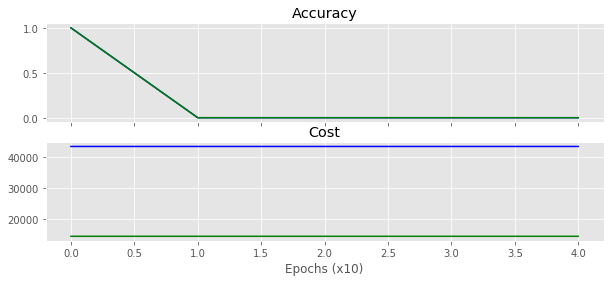

In [370]:
num_labels = 1
input_nodes = X_train.shape[1]
print(input_nodes)
train_size = X_train.shape[0]
print(train_size)
n_samples = y_train.shape[0]
print(n_samples)

learning_rate = 0.005
training_dropout = 0.9
display_step = 1
training_epochs = 5
batch_size = 100
accuracy_history = [] 
cost_history = []
valid_accuracy_history = [] 
valid_cost_history = [] 

def calculate_hidden_nodes(nodes):
    return (((2 * nodes)/3) + num_labels)

hidden_nodes1 = round(calculate_hidden_nodes(input_nodes))
hidden_nodes2 = round(calculate_hidden_nodes(hidden_nodes1))
hidden_nodes3 = round(calculate_hidden_nodes(hidden_nodes2))
print(input_nodes, hidden_nodes1, hidden_nodes2, hidden_nodes3)

pkeep = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, [None, input_nodes])

W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.1))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.1))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)

W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.1)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.relu(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.1)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)


y = y4
y_ = tf.placeholder(tf.float32, [None, num_labels]) 


cost = -tf.reduce_sum(y_ * tf.log(y))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = X_train[batch * batch_size : (1 + batch) * batch_size]
            batch_y = y_train[batch * batch_size : (1 + batch) * batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, 
                                             y_: batch_y,
                                             pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], 
                                               feed_dict={x: X_train, y_: y_train, 
                                                          pkeep: training_dropout})

            valid_accuracy, valid_newCost = sess.run([accuracy, cost], 
                                                     feed_dict={x: X_test, 
                                                                y_: y_test, pkeep: 1})

            print ("Epoch:", epoch, "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost), 
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            # Record the results of the model
            accuracy_history.append(train_accuracy)
            cost_history.append(newCost)
            valid_accuracy_history.append(valid_accuracy)
            valid_cost_history.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_history) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print("Optimization Finished!")
    
    # Plot the accuracy and cost summaries 
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

    ax1.plot(accuracy_history, color='b') # blue
    ax1.plot(valid_accuracy_history, color='g') # green
    ax1.set_title('Accuracy')

    ax2.plot(cost_history, color='b')
    ax2.plot(valid_cost_history, color='g')
    ax2.set_title('Cost')

    plt.xlabel('Epochs (x10)')
    plt.show()


In [284]:
print(train_with_features.head(1))

       id  usefulCount  Sentimental_Polarity  Sentimental_Subjectivity  \
0  206461           27                   0.0                       0.0   

   recall_status  vader_neg  vader_neu  vader_pos  vader_comp  stanford_neg  \
0           True        0.0        1.0        0.0         0.0           0.0   

   stanford_neu  stanford_pos  
0           1.0           0.0  


In [406]:
train['recall_status'] = np.where(train['recall_status'] == True, 1, train['recall_status'])
train['recall_status'] = np.where(train['recall_status'] == False, 0, train['recall_status'])
test['recall_status'] = np.where(test['recall_status'] == True, 1, test['recall_status'])
test['recall_status'] = np.where(test['recall_status'] == False, 0, test['recall_status'])
whole['recall_status'] = np.where(whole['recall_status'] == True, 1, whole['recall_status'])
whole['recall_status'] = np.where(whole['recall_status'] == False, 0, whole['recall_status'])


train_data = whole
y = whole['recall_status'].values
X = train_data.drop(columns = ['recall_status']).values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.astype(float)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

X_train = X_train.astype(float)

X_test = X_test.astype(float)

print (X.shape)

print (y_test[1:50])


(215063, 9)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0]


In [390]:
# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

# print (encoded_Y[1:50])


encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)

print (encoded_Y_test[1:50])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0]


In [416]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
import itertools 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Function to create model, required for KerasClassifier
# def create_model(optimizer='rmsprop', init='glorot_uniform'):
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(12, input_dim=9, kernel_initializer=init, activation='relu'))
# 	model.add(Dense(8, kernel_initializer=init, activation='relu'))
# 	model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
# 	# Compile model
# 	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# 	return model

# create model
# model = KerasClassifier(build_fn=create_model, verbose=0)
# # grid search epochs, batch size and optimizer
# optimizers = ['rmsprop', 'adam']
# init = ['glorot_uniform', 'normal']
# epochs = [100, 150]
# batches = [100]
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
# grid = GridSearchCV(estimator=model, param_grid=param_grid)
# grid_result = grid.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# 	print("%f (%f) with: %r" % (mean, stdev, param))

from sklearn.metrics import roc_auc_score

predictions = grid_result.predict(X_test)
print (classification_report(y_test, predictions))
roc_auc_score(y_test, predictions)

# import sklearn.metrics
# precision = sklearn.metrics.precision_score(y_test, predictions)
# f1 = sklearn.metrics.f1_score(y_test, pred)
# recall = sklearn.metrics.recall_score(y_test, predictions)
#     


# from sklearn.metrics import classification_report
# 
# predictions = grid_result.predict(X_train)
# print (classification_report(encoded_Y, predictions))

# precision = sklearn.metrics.precision_score(y_test, predictions)
# f1 = sklearn.metrics.f1_score(y_test, pred)
# recall = sklearn.metrics.recall_score(y_test, predictions)
# 
# 
# roc = sklearn.metrics.roc_auc_score(y_test, pred)
# print('Precision: ', precision, ' F1: ', f1, ' Recall: ', recall, ' ROC AUC: ', roc)
# print('Test Accuracy:', acc_pred)

# # larger model
# def create_larger():
# 	# create model
# 	model = Sequential()
# 	model.add(Dense(64, input_dim=9, kernel_initializer='normal', activation='relu'))
# 	model.add(Dense(32, kernel_initializer='normal', activation='relu'))
# 	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# 	# Compile model
#     	# Compile model
# 	sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
# 	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# 	return model
# 
# model = create_larger()
# # Fit the model
# model.fit(X_train, encoded_Y, epochs=150, batch_size=100, verbose=0)
# # evaluate the model
# scores = model.evaluate(X_train, encoded_Y, verbose=0)
# 
# predictions = model.predict_classes(X_test)
# # 
# # rounded = [round(x[0]) for x in predictions]
# # print(rounded)
# 
# print(predictions[1:50])
# 
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# 
# cnf_matrix = confusion_matrix(encoded_Y_test, predictions)
# np.set_printoptions(precision=2)
# class_names = ['Recalled', 'Not Recalled']
# plt.figure()
# plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')

# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=150, batch_size=500, verbose=1)))
# pipeline = Pipeline(estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(pipeline, X_train, encoded_Y, cv=kfold)
# print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     43284
           1       0.00      0.00      0.00     10482

   micro avg       0.81      0.81      0.81     53766
   macro avg       0.40      0.50      0.45     53766
weighted avg       0.65      0.81      0.72     53766



0.5

In [420]:


# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
max_features = 9
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())


0.8056814903338424


In [421]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 9
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

In [ ]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

In [286]:
def get_train_test(whole, downsample = False, n_is_called = 1, seed = 1234):
    X = whole.drop(columns = ['is_recalled']).values
    y = whole['is_recalled'].values.reshape([-1, 1])
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    y_test = y_test.reshape((-1,1))

    if downsample == False:
        y_train = y_train.reshape((-1,1))
        return X_train, y_train, X_test, y_test
    else:
        not_recalled_idx = [x for x in range(y_train.shape[0]) if y_train[x]==0]
        is_recalled_idx = [x for x in range(y_train.shape[0]) if y_train[x]==1]
        assert len(not_recalled_idx) + sum(y_train)[0] == y_train.shape[0]
        chose = np.random.choice(not_recalled_idx, int(n_is_called * sum(y_train)[0]), replace=False)
        X_train_downsample = np.vstack((X_train[chose, :],X_train[is_recalled_idx, :]))
        y_train_downsample = np.vstack((y_train[chose, :], y_train[y_train==1].reshape((-1, 1))))
        y_train_downsample = y_train_downsample.reshape((-1, 1))
        return X_train_downsample, y_train_downsample, X_test, y_test

In [288]:
#########################
### GLOBAL PARAMETERS ###
#########################

# DATA SET PARAMETERS
# Get our dimensions for our different variables and placeholders:
# numFeatures = the number of words extracted from each email
numFeatures = X_train.shape[1]
print(numFeatures)
# numLabels = number of classes we are predicting (here just 2: Ham or Spam)
numLabels = y_train.shape[1]
print(numLabels)
# TRAINING SESSION PARAMETERS
# number of times we iterate through training data
# tensorboard shows that accuracy plateaus at ~25k epochs
numEpochs = 1000
# a smarter learning rate for gradientOptimizer
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

11
1


In [289]:
####################
### PLACEHOLDERS ###
####################

# X = X-matrix / feature-matrix / data-matrix... It's a tensor to hold our email
# data. 'None' here means that we can hold any number of emails
X = tf.placeholder(tf.float32, [None, numFeatures])
# yGold = Y-matrix / label-matrix / labels... This will be our correct answers
# matrix. Every row has either [1,0] for SPAM or [0,1] for HAM. 'None' here 
# means that we can hold any number of emails
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [291]:
#################
### VARIABLES ###
#################

# Values are randomly sampled from a Gaussian with a standard deviation of:
#     sqrt(6 / (numInputNodes + numOutputNodes + 1))

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))

In [292]:
######################
### PREDICTION OPS ###
######################

# INITIALIZE our weights and biases
init_OP = tf.initialize_all_variables()

# PREDICTION ALGORITHM i.e. FEEDFORWARD ALGORITHM
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [293]:
#####################
### EVALUATION OP ###
#####################

# COST FUNCTION i.e. MEAN SQUARED ERROR
cost = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

In [294]:
#######################
### OPTIMIZATION OP ###
#######################

# OPTIMIZATION ALGORITHM i.e. GRADIENT DESCENT
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

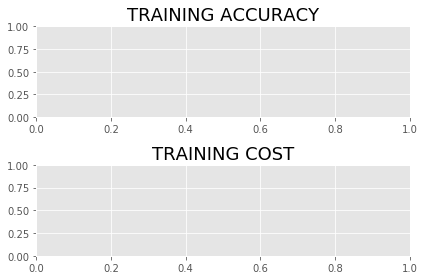

In [295]:
###########################
### GRAPH LIVE UPDATING ###
###########################

epoch_values=[]
accuracy_values=[]
cost_values=[]
# Turn on interactive plotting
plt.ion()
# Create the main, super plot
fig = plt.figure()
# Create two subplots on their own axes and give titles
ax1 = plt.subplot("211")
ax1.set_title("TRAINING ACCURACY", fontsize=18)
ax2 = plt.subplot("212")
ax2.set_title("TRAINING COST", fontsize=18)
plt.tight_layout()

In [296]:
#####################
### RUN THE GRAPH ###
#####################

# Create a tensorflow session
sess = tf.Session()

# Initialize all tensorflow variables
sess.run(init_OP)

## Ops for vizualization
# argmax(activation_OP, 1) gives the label our model thought was most likely
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
# False is 0 and True is 1, what was our average?
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)
# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)
# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)
# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))
# Merge all summaries
all_summary_OPS = tf.summary.merge_all()
# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

# Initialize reporting variables
cost = 0
diff = 1

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: X_train, yGold: y_train})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            summary_results, train_accuracy, newCost = sess.run(
                [all_summary_OPS, accuracy_OP, cost_OP], 
                feed_dict={X: X_train, yGold: y_train}
            )
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Write summary stats to writer
            writer.add_summary(summary_results, i)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g"%(i, train_accuracy))
            print("step %d, cost %g"%(i, newCost))
            print("step %d, change in cost %g"%(i, diff))

            # Plot progress to our two subplots
            accuracyLine, = ax1.plot(epoch_values, accuracy_values)
            costLine, = ax2.plot(epoch_values, cost_values)
            fig.canvas.draw()
            time.sleep(1)


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: X_test, 
                                                                yGold: y_test})))
# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: X_test, 
                                                                yGold: y_test})))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_21' with dtype float and shape [?,1]
	 [[node Placeholder_21 (defined at <ipython-input-268-6a3308d35f0f>:11)  = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_21', defined at:
  File "C:\Users\10252946\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\10252946\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\10252946\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\10252946\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\10252946\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-268-6a3308d35f0f>", line 11, in <module>
    yGold = tf.placeholder(tf.float32, [None, numLabels])
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1747, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6251, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_21' with dtype float and shape [?,1]
	 [[node Placeholder_21 (defined at <ipython-input-268-6a3308d35f0f>:11)  = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [259]:
# function to create train, validation, test data given stock data and sequence length
def load_data(whole, seq_len):
    data_raw = whole.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [260]:
# create train, test data
seq_len = 100 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(X_train, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


x_train.shape =  (171971, 99, 12)
y_train.shape =  (171971, 12)
x_valid.shape =  (21496, 99, 12)
y_valid.shape =  (21496, 12)
x_test.shape =  (21496, 99, 12)
y_test.shape =  (21496, 12)


In [231]:
n_recalled = y_train.sum() + y_test.sum()
n_not_recalled = len(y_train) + len(y_test) - n_recalled
n_not_recalled / (len(y_train) + len(y_test))

0.8062208224579502

In [228]:
# inputs
training_epochs = 3000
learning_rate = 0.01

cost_history = np.empty(shape=[1],dtype=float)

X = tf.placeholder(tf.float32,[None,11])
Y = tf.placeholder(tf.float32,[None,1])
is_training=tf.Variable(True,dtype=tf.bool)

num_inputs = 11    # 16 independent variables
num_hid1 = 128
num_hid2 = 64
num_hid3 = 32
num_output = 1 # is_recalled/not_recalled

In [247]:
X_train, y_train, X_test, y_test = get_train_test(whole, downsample = True, n_is_called = 1)
y_train_ = y_train.reshape((y_train.shape[0],1))
y_test_ = y_test.reshape((y_test.shape[0],1))

In [250]:
# models

initializer = tf.contrib.layers.xavier_initializer()
hidden1 = tf.layers.dense(X, num_hid1, activation=tf.nn.elu, kernel_initializer=initializer, name = 'hidden1')
hiddem2 = tf.layers.dense(hidden1, num_hid2, activation=tf.nn.elu, kernel_initializer=initializer, name = 'hidden2')
hidden3 = tf.layers.dense(hiddem2, num_hid3, activation=tf.nn.elu, kernel_initializer=initializer, name = 'hidden3')
output1 = tf.layers.dense(hidden3, num_output, activation=None, name = 'output')

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=output1)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


predicted = tf.round(tf.nn.sigmoid(output1))
correct_pred = tf.equal(predicted, Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

ValueError: Variable hidden1/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\framework\ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\framework\ops.py", line 3274, in create_op
    op_def=op_def)
  File "C:\Users\10252946\Documents\Education\GATech\BigDataForHealth\Projects\venv\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)


In [ ]:
# session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(training_epochs + 1):
        sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
        loss, _, acc = sess.run([cost, optimizer, accuracy], feed_dict={
                                 X: X_train, Y: y_train})
        cost_history = np.append(cost_history, acc)
        if step % 100 == 0:
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))
            
    # Test model and check accuracy
    acc_pred = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    pred = sess.run(predicted, feed_dict={X: X_test, Y: y_test})
    print('Test Accuracy:', acc_pred)
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)
    class_names = ['Recalled', 'Not Recalled']
    plt.figure()
    plot_confusion_matrix(cnf_matrix,normalize=True, classes=class_names, title='Normalized confusion matrix')
    